install.packages('Seurat')
install.packages("tidyverse")
install.packages("ggplot2")

In [1]:
library(Seurat)
library(ggplot2)
library(tidyverse)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Load data

In [6]:
gctb2 = readRDS("/home/linxy29/data/maester/oagct/gctb2/gctb2.rds")
variant_folder = "/home/linxy29/data/maester/oagct/gctb2/variant_selection/HEMO_pipeline_maester_cellSNP_celltype_gctb2TumorvsNorm_gctb2subset_analysis/WaldVariant_tumor/"
res_folder = str_c(variant_folder, "plot/")

In [47]:
mitoClone_barcode = read_tsv(str_c(variant_folder, "passed_sample_names.txt"), col_names = FALSE)
mitoClone_results = read_csv(str_c(variant_folder, "SNP_VAE_results/SNP_VAE_results.csv"))
#mitoClone_cellfilter = read_tsv(str_c(variant_folder, "SNP_VAE_results/cell_filter.txt"), col_names = FALSE)
mitoClone_clone = read_tsv(str_c(variant_folder, "SNP_VAE_results/cloneID.txt"), col_names = FALSE)
mitoClone = cbind(mitoClone_barcode, mitoClone_results)
#mitoClone = cbind(mitoClone_barcode, mitoClone_cellfilter)
#colnames(mitoClone) = c("barcode", "cellfilter")
## rename the first two column names
colnames(mitoClone)[1] = "barcode"
colnames(mitoClone)[2] = 'cellID'
head(mitoClone)

Rows: 558 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


New names:
• `` -> `...1`
Rows: 558 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (24): ...1, label_0, label_1, label_2, label_3, label_4, label_5, label_...
lgl  (1): cell_filter

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 558 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,barcode,cellID,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,⋯,label_14,label_15,label_16,label_17,label_18,cell_filter,PCA_1,PCA_2,UMAP_1,UMAP_2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,L86_AACAAGAAGTCACGAG,0,0,0,1,1,1,0,1,8,⋯,6,9,7,12,4,TRUE,5.509399,-0.233941930,-4.539131,10.687986
2,L86_AACCTGACAATGTGGG,1,0,0,1,1,1,6,1,5,⋯,8,1,14,12,15,TRUE,6.319358,-1.046385000,-3.404563,9.239217
3,L86_AACGAAAGTCGACTTA,2,0,0,1,1,1,6,1,5,⋯,8,16,16,1,15,TRUE,4.520307,0.007435469,-3.002102,9.261022
4,L86_AACGGGACAACGAGGT,3,0,0,1,1,1,5,1,1,⋯,0,14,16,1,15,TRUE,4.362144,1.079141000,-4.032373,9.430320
5,L86_AACTTCTGTAATCAAG,4,0,0,1,1,1,5,1,1,⋯,0,15,5,1,1,TRUE,5.232814,0.414770800,-3.652338,9.927262
6,L86_AACTTCTTCCTGGGAC,5,0,0,1,1,1,0,1,8,⋯,0,14,5,12,4,TRUE,5.774277,-0.342952300,-4.149532,10.660486


In [48]:
mitoClone_subset = mitoClone %>% filter(cell_filter == TRUE)
head(mitoClone_subset)

,barcode,cellID,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,⋯,label_14,label_15,label_16,label_17,label_18,cell_filter,PCA_1,PCA_2,UMAP_1,UMAP_2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,L86_AACAAGAAGTCACGAG,0,0,0,1,1,1,0,1,8,⋯,6,9,7,12,4,TRUE,5.509399,-0.233941930,-4.539131,10.687986
2,L86_AACCTGACAATGTGGG,1,0,0,1,1,1,6,1,5,⋯,8,1,14,12,15,TRUE,6.319358,-1.046385000,-3.404563,9.239217
3,L86_AACGAAAGTCGACTTA,2,0,0,1,1,1,6,1,5,⋯,8,16,16,1,15,TRUE,4.520307,0.007435469,-3.002102,9.261022
4,L86_AACGGGACAACGAGGT,3,0,0,1,1,1,5,1,1,⋯,0,14,16,1,15,TRUE,4.362144,1.079141000,-4.032373,9.430320
5,L86_AACTTCTGTAATCAAG,4,0,0,1,1,1,5,1,1,⋯,0,15,5,1,1,TRUE,5.232814,0.414770800,-3.652338,9.927262
6,L86_AACTTCTTCCTGGGAC,5,0,0,1,1,1,0,1,8,⋯,0,14,5,12,4,TRUE,5.774277,-0.342952300,-4.149532,10.660486


## Plots

Subset tumor cells

In [49]:
gctb2.mse = subset(gctb2, , subset = cell.type == "Mesenchymal")
mitoClone = mitoClone %>% mutate(barcode = str_c(barcode, "-1"))
head(mitoClone)

,barcode,cellID,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,⋯,label_14,label_15,label_16,label_17,label_18,cell_filter,PCA_1,PCA_2,UMAP_1,UMAP_2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,L86_AACAAGAAGTCACGAG-1,0,0,0,1,1,1,0,1,8,⋯,6,9,7,12,4,TRUE,5.509399,-0.233941930,-4.539131,10.687986
2,L86_AACCTGACAATGTGGG-1,1,0,0,1,1,1,6,1,5,⋯,8,1,14,12,15,TRUE,6.319358,-1.046385000,-3.404563,9.239217
3,L86_AACGAAAGTCGACTTA-1,2,0,0,1,1,1,6,1,5,⋯,8,16,16,1,15,TRUE,4.520307,0.007435469,-3.002102,9.261022
4,L86_AACGGGACAACGAGGT-1,3,0,0,1,1,1,5,1,1,⋯,0,14,16,1,15,TRUE,4.362144,1.079141000,-4.032373,9.430320
5,L86_AACTTCTGTAATCAAG-1,4,0,0,1,1,1,5,1,1,⋯,0,15,5,1,1,TRUE,5.232814,0.414770800,-3.652338,9.927262
6,L86_AACTTCTTCCTGGGAC-1,5,0,0,1,1,1,0,1,8,⋯,0,14,5,12,4,TRUE,5.774277,-0.342952300,-4.149532,10.660486


In [50]:
print(gctb2.mse)
print(dim(mitoClone))

An object of class Seurat 
30236 features across 956 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap
[1] 558  26


In [51]:
temp = data.frame(barcode = Cells(gctb2.mse)) %>% left_join(mitoClone)
head(temp)
dim(temp)

Joining with `by = join_by(barcode)`


,barcode,cellID,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,⋯,label_14,label_15,label_16,label_17,label_18,cell_filter,PCA_1,PCA_2,UMAP_1,UMAP_2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,L86_AAACGAAAGGAGCTGT-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,L86_AAACGCTCATGTGCTA-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,L86_AAAGGTACATCTTTCA-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,L86_AAATGGAGTGACAGCA-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,L86_AACAAGAAGTCACGAG-1,0,0,0,1,1,1,0,1,8,⋯,6,9,7,12,4,TRUE,5.509399,-0.2339419,-4.539131,10.68799
6,L86_AACCATGAGACCTCCG-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] 956  26

In [52]:
gctb2.mse$mitoClone = temp$label_4
temp$orig.ident = gctb2.mse$orig.ident

In [45]:
set.seed(123)
gctb2.mse <- RunPCA(object = gctb2.mse)
gctb2.mse <- FindNeighbors(object = gctb2.mse, dims = 1:30)
gctb2.mse <- FindClusters(object = gctb2.mse)
gctb2.mse <- RunUMAP(object = gctb2.mse, dims = 1:30)

PC_ 1 
Positive:  NDUFA4L2, KCNJ8, HIGD1B, RGS5, TPPP3, KCNE4, COX4I2, ABCC9, PPP1R14A, FAM162B 
	   CCDC102B, PLXDC1, FILIP1L, EDNRA, TDO2, EGFL6, MMP11, LHFPL6, C11orf96, GUCY1A1 
	   GJC1, CDH6, PDE1A, AVPR1A, GUCY1B1, THY1, COBLL1, PLAC9, CD248, RASL12 
Negative:  PTPRC, LAPTM5, CD74, RGS2, LCP1, VAMP8, HLA-DQA2, FYB1, HLA-DRA, HLA-DPA1 
	   HLA-DRB1, HLA-DPB1, EFHD2, NFKBIA, HLA-DQB1, HLA-DQA1, GIMAP4, UCP2, DUSP2, CORO1A 
	   S100A10, SAT1, PLEK, HLA-DMA, FCER1G, SAMSN1, CTSS, AIF1, COTL1, TYROBP 
PC_ 2 
Positive:  AGR2, PRSS2, KRT81, PAGE2, PAGE2B, PAGE5, HMGB3, LINC00973, NOG, SYCE1 
	   MAGEC2, GDF15, PICSAR, MGST1, KRT18, APCDD1L, HMGA1, TMEM158, PCDH10, RRAD 
	   MDK, NEXN, PTN, PLPP2, CRABP2, DIRAS3, NTM, MFAP2, SUCNR1, FAM133A 
Negative:  CRIP1, NDUFA4L2, FILIP1L, HIGD1B, RGS5, PPP1R14A, TPPP3, KCNJ8, COX4I2, ARHGDIB 
	   CHCHD10, ABCC9, FAM162B, MARCKS, SPARCL1, CD36, CD74, STOM, IGFBP4, HLA-DPB1 
	   NRARP, PTP4A3, GUCY1A1, A2M, PDE1A, HLA-DPA1, CDH6, TINAGL1, LAPTM5, HL

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 956
Number of edges: 39477

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7367
Number of communities: 9
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
23:50:47 UMAP embedding parameters a = 0.9922 b = 1.112

23:50:47 Read 956 rows and found 30 numeric columns

23:50:47 Using Annoy for neighbor search, n_neighbors = 30

23:50:47 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:50:48 Writing NN index file to temp file /tmp/RtmpRs2sFK/file76c82d91b792

23:50:48 Searching Annoy index using 1 thread, search_k = 3000

23:50:48 Annoy recall = 100%

23:50:48 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 

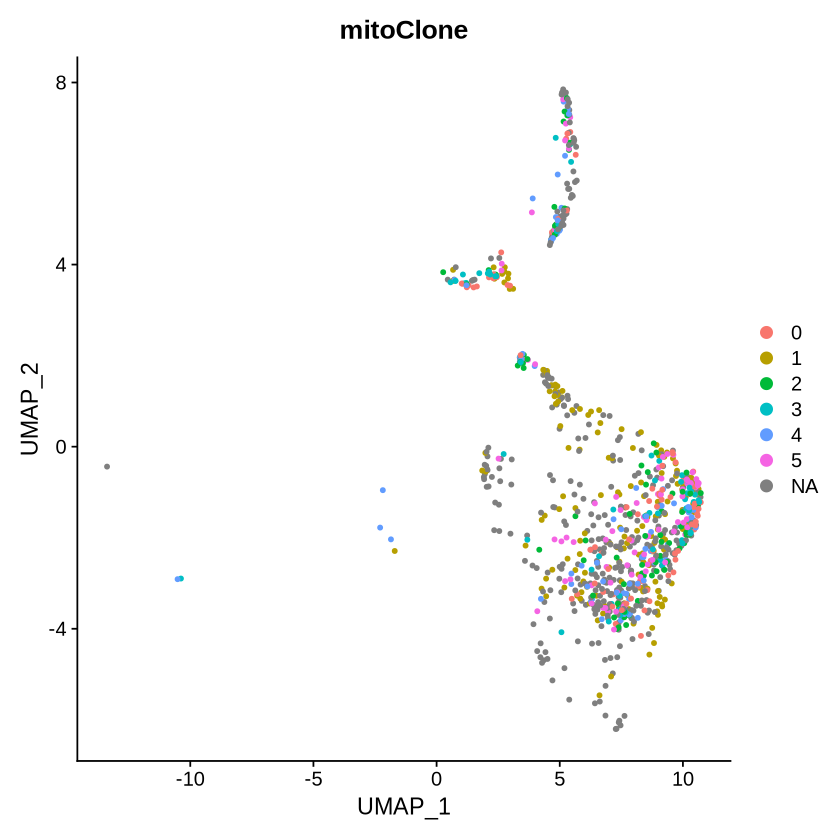

In [53]:
DimPlot(gctb2.mse, group.by = "mitoClone")

Warning message:
“Removed 398 rows containing missing values or values outside the scale range
(`geom_point()`).”


Warning message:
“Removed 398 rows containing missing values or values outside the scale range
(`geom_point()`).”


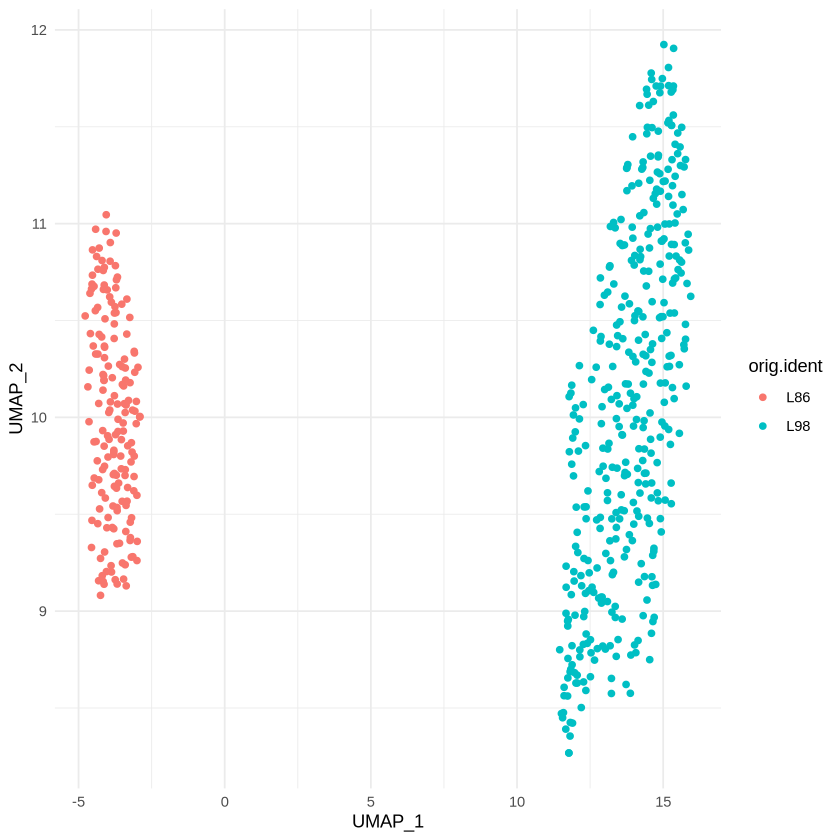

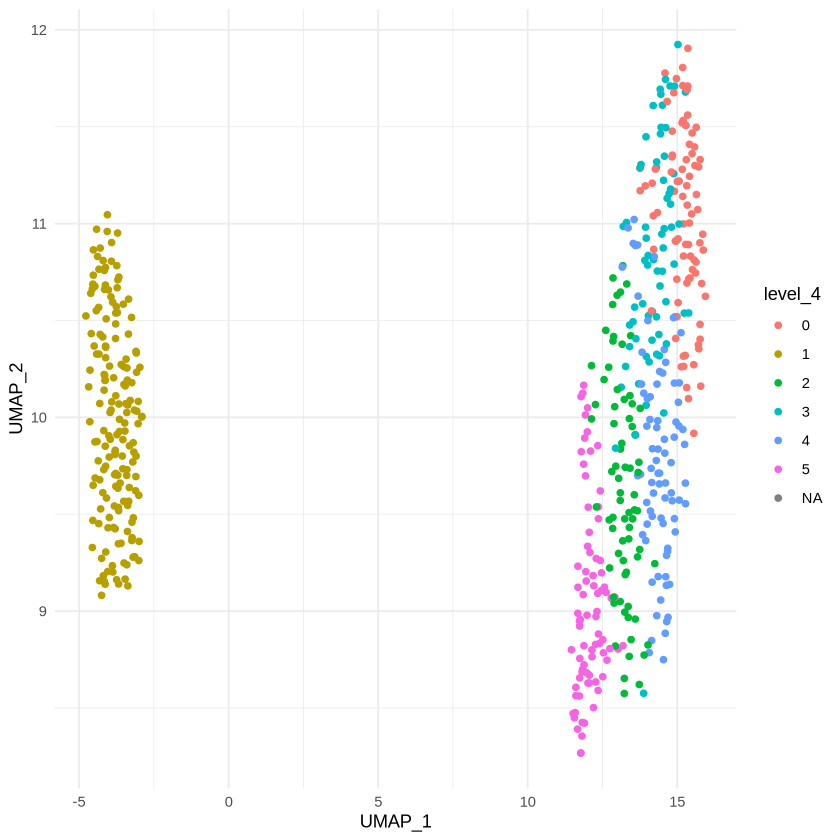

In [60]:
## use PCA coordinates to plot
sample_SNPmanifold = ggplot(data = temp, aes(x = UMAP_1, y = UMAP_2, color = orig.ident)) + geom_point() + theme_minimal()
clone_SNPmanifold = temp %>% 
    mutate(level_4 = as.factor(label_4)) %>%
    ggplot(aes(x = UMAP_1, y = UMAP_2, color = level_4)) + geom_point() + theme_minimal()
sample_SNPmanifold
clone_SNPmanifold

Warning message:
“Removed 398 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 398 rows containing missing values or values outside the scale range
(`geom_point()`).”


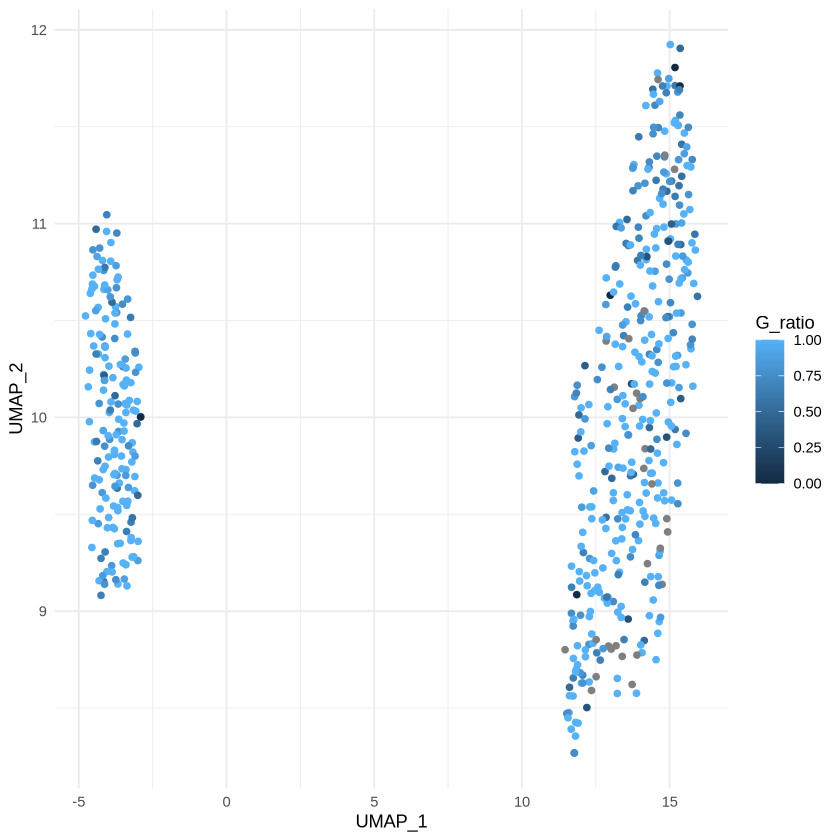

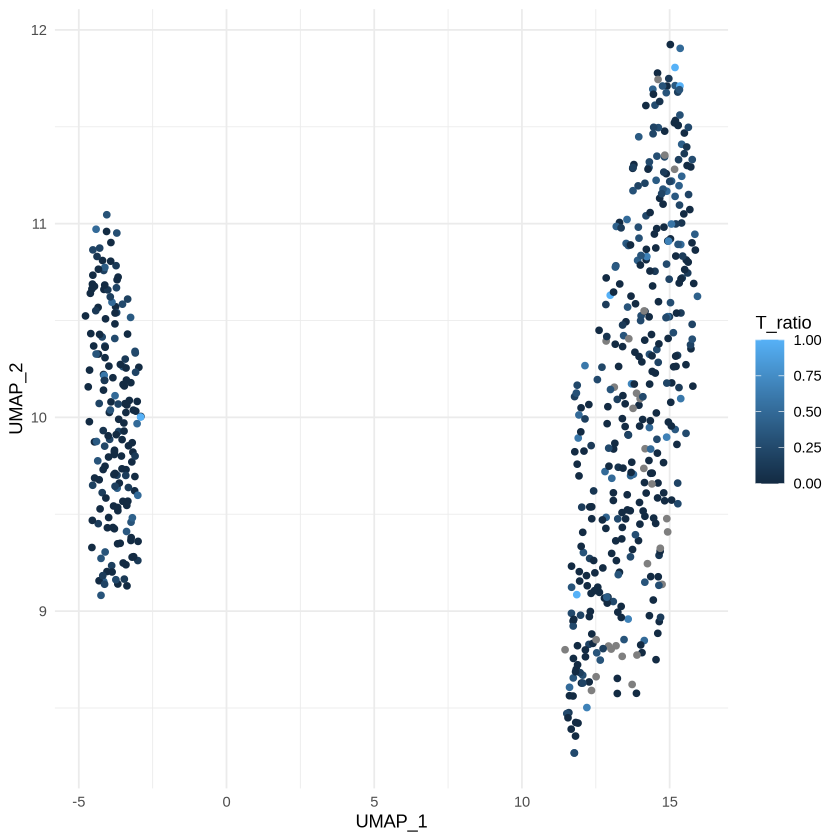

In [77]:
temp$G_ratio = gctb2.mse$G_ratio
temp$T_ratio = gctb2.mse$T_ratio
gratio_SNPmanifold = ggplot(data = temp, aes(x = UMAP_1, y = UMAP_2, color = G_ratio)) + geom_point() + theme_minimal()
tratio_SNPmanifold = ggplot(data = temp, aes(x = UMAP_1, y = UMAP_2, color = T_ratio)) + geom_point() + theme_minimal()
gratio_SNPmanifold
tratio_SNPmanifold

In [67]:
clone_count = gctb2.mse$mitoClone %>% as.factor %>% summary()
clone_count

0    1    2    3    4    5 NA's 
  86  171   73   68   80   80  398

png 
  2

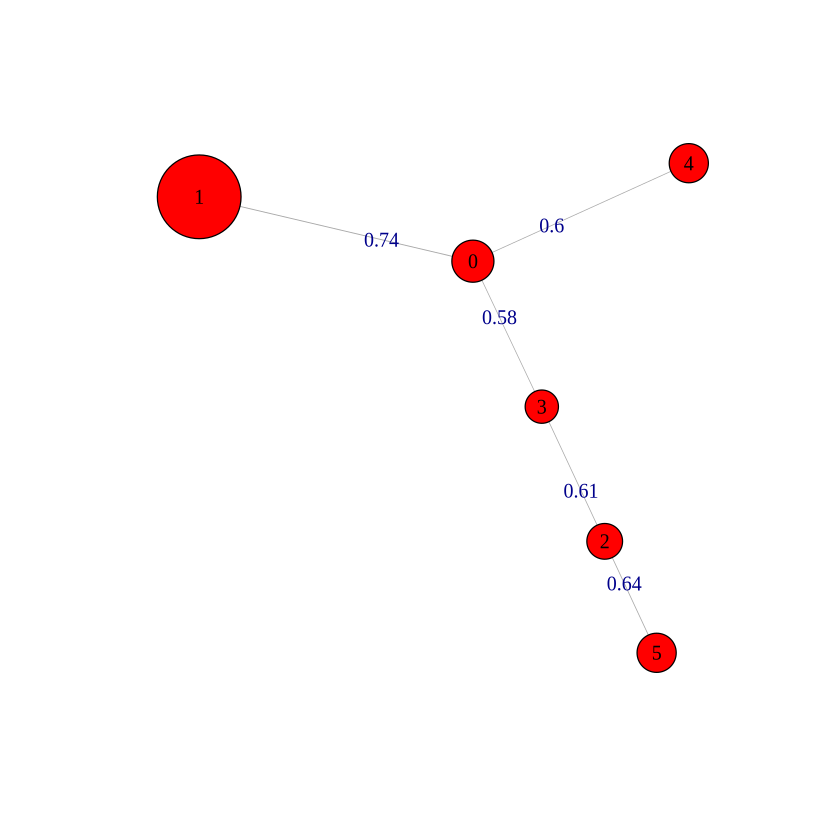

In [76]:
# Load the igraph package
library(igraph)

# Create a sample graph with a 'value' attribute
nodes <- data.frame(name=c(0, 1, 2, 3, 4, 5),
                    value=rep(1, 6),
                    size=(clone_count[1:6])/5)

edges <- data.frame(from=c(0, 0, 0, 3, 2),
                    to=c(1, 4, 3, 2, 5),
                    weight=c(0.74, 0.6, 0.58, 0.61, 0.64))

# Create the graph object
g <- graph_from_data_frame(d=edges, vertices=nodes, directed=FALSE)

# Map values to grayscale colors (0 = white, 1 = black)
value_range <- V(g)$value
colors <- rgb(1, 1-value_range, 1-value_range)  # Create a red gradient

# Set the vertex attributes
V(g)$color <- colors
V(g)$size <- V(g)$size

# Plot the graph
png(str_c(res_folder, "celltype_mitoClone_graph.png"), width=800, height=600)
plot(g, vertex.label=V(g)$name, vertex.label.color="black", edge.label=E(g)$weight, edge.width=E(g)$weight, edge.arrow.size=0.5)
dev.off()

plot(g, vertex.label=V(g)$name, vertex.label.color="black", edge.label=E(g)$weight, edge.width=E(g)$weight, edge.arrow.size=0.5)
     